In [74]:
%pip install seaborn matplotlib --quiet

/Users/peterdresslar/.pyenv/versions/3.12.8/bin/python: No module named uv
Note: you may need to restart the kernel to use updated packages.


# Differential Equation Solving with SciPy

This notebook demonstrates the distinctions in differential equation solving techniques offered by the Python [SciPy](scipy.org) package. There are two primary approaches for ordinary differential equations (ODE) in SciPy:
1. The older [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) function
2. The newer [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) function

(Apologies to `ode`, an [object-oriented implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html#scipy.integrate.ode) not reviewed here!)

## Introduction and Acknowledgement

To begin, we should mention that there is an accessible and comprehensive Python math text from UCBerkeley called [Python Numerical Methods](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html). Chapter 22 is called "[Ordinary Differential Equation - Initial Value Problems](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html)," and it might be pointed out that the difference between the two is that initial value problems (IVP) supply starting conditions to the ordinary differential equations so that they can be solved with a unique numerical functions.

We'll start with the basic ordinary differential equation from the book, and, like the book, we will turn it into an IVP by setting an initial condition:

$$\begin{equation}
    \begin{aligned}
        \frac{dS(t)}{dt} &= \cos(t) \\[10pt]
        S(t0) &= S0
    \end{aligned}
\end{equation}$$

The reason is that this is such a useful example is that the precise solution of the problem, you might recall from trigonometry, is $$S(t) = sin(t)$$.

This is especially useful for our purposes. In the book, the code applied (and we will not yet use the plot) uses the `solve_ivp` solver with "traditional" settings, and then simply calculates sin(t) for the same values of t, in order to compare the two outcomes. We will make a few changes to the code from the book in order to deal with some complications between the two solvers:

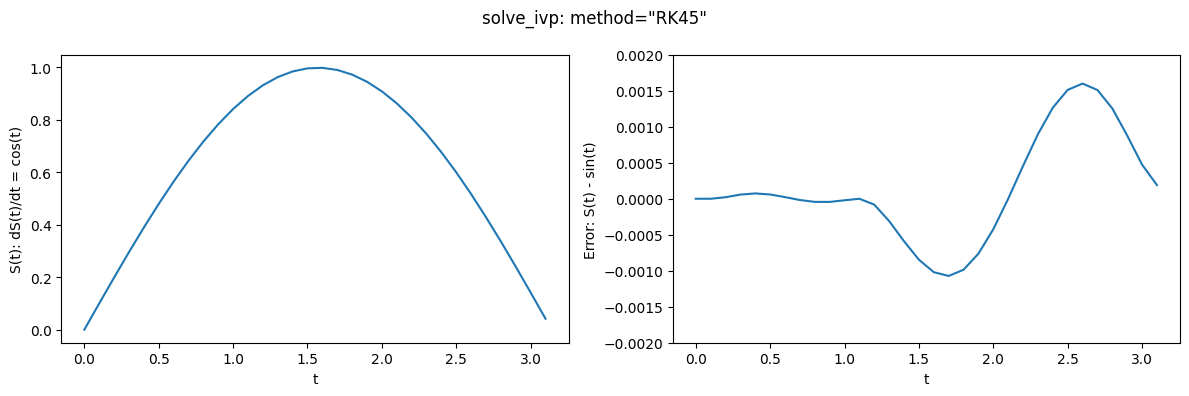

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

def cos_func_ivp(t, S):  # avoid using lambda function since the signatures are a bit confusing
    """
    A function for solve_ivp, using a parameter signature as needed.
    """
    # this system is state-independent and S is unused. it is still required for solve_ivp.
    return [np.cos(t)]  # some solvers require a list of functions

t_eval = np.arange(0, np.pi, 0.1)
solution = solve_ivp(cos_func_ivp, [0, np.pi], [0], t_eval=t_eval)

# relevant here, within solution we have:
# t: the time values
# y: the solution values
# sol: the solution values as an array
# success: a boolean indicating whether the solver was successful
# message: a message from the solverA

plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="RK45"')
plt.subplot(121)
plt.plot(solution.t, solution.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution.t, solution.y[0] - np.sin(solution.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-0.002, 0.002)
plt.tight_layout()
plt.show()


A lovely approach, although it bears mentioning that the scale on the error plot could lead to a bit of confusion. Here are the same plots, except this time using congruous scales:

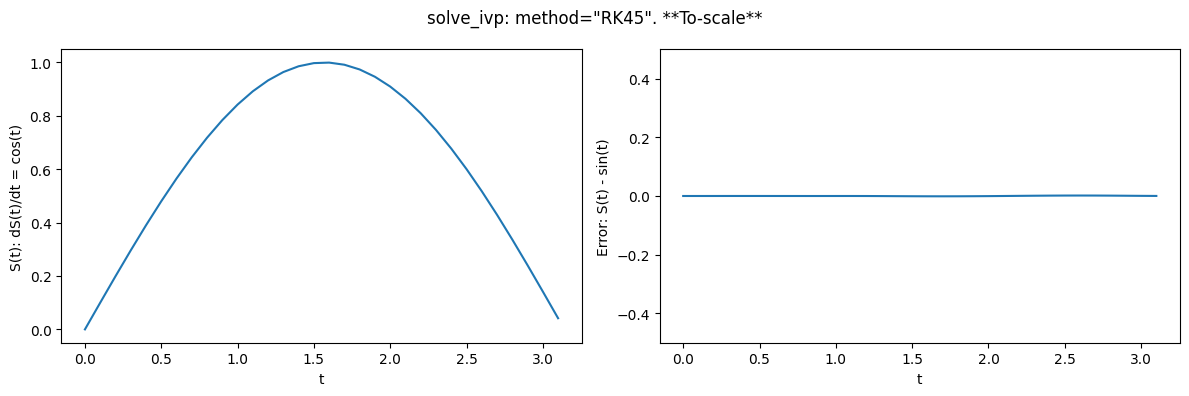

In [76]:
plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="RK45". **To-scale**')
plt.subplot(121)
plt.plot(solution.t, solution.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution.t, solution.y[0] - np.sin(solution.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.show()

As we can (can't!) see, solve_ivp performs well enough relative to scale for a small system like this one.

In the following plots, we'll stick to our scale relative to the RK45 error band we saw in our first plot, $\pm 0.002$.

Unlike with `odeint` there are several solvers available to work with `solve_ivp`. Above, we did not specify a solver, and so the processing used "Explicit Runge-Kutta method of order 5(4)" (from the SciPy reference).

Other possibilities are RK23:

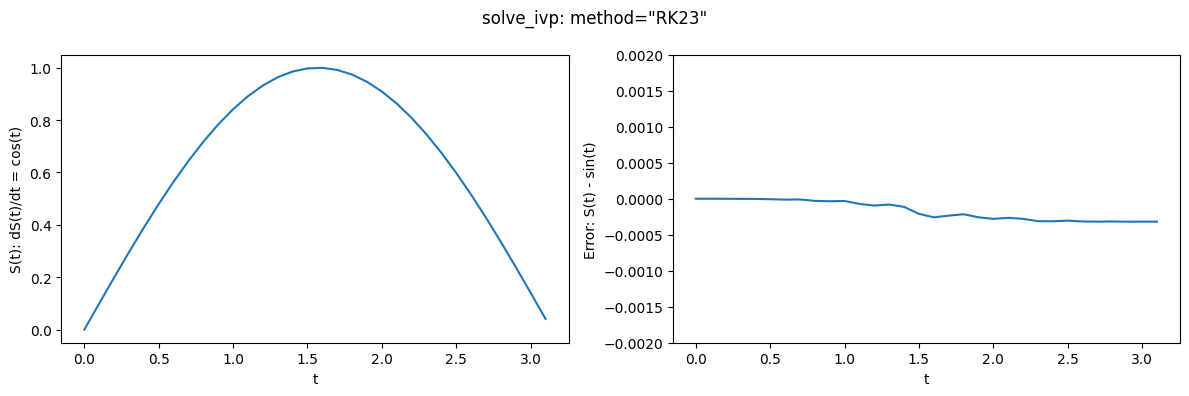

In [77]:
solution_23 = solve_ivp(cos_func_ivp, [0, np.pi], [0], method='RK23', t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="RK23"')
plt.subplot(121)
plt.plot(solution_23.t, solution_23.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution_23.t, solution_23.y[0] - np.sin(solution_23.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-0.002, 0.002)
plt.tight_layout()
plt.show()

"‘Radau’: Implicit Runge-Kutta method of the Radau IIA family of order 5:"

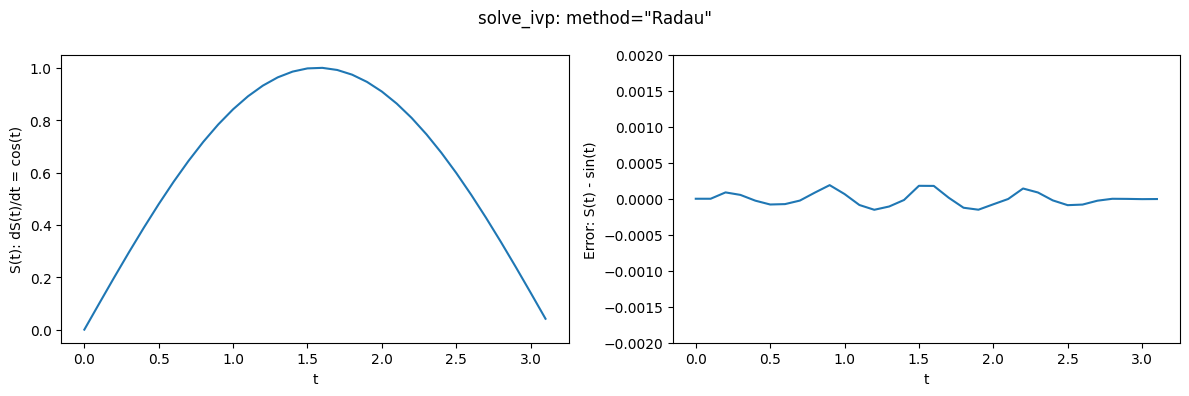

In [78]:
solution_radau = solve_ivp(cos_func_ivp, [0, np.pi], [0], method='Radau', t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="Radau"')
plt.subplot(121)
plt.plot(solution_radau.t, solution_radau.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution_radau.t, solution_radau.y[0] - np.sin(solution_radau.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-0.002, 0.002)
plt.tight_layout()
plt.show()

"‘BDF’: Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation:"

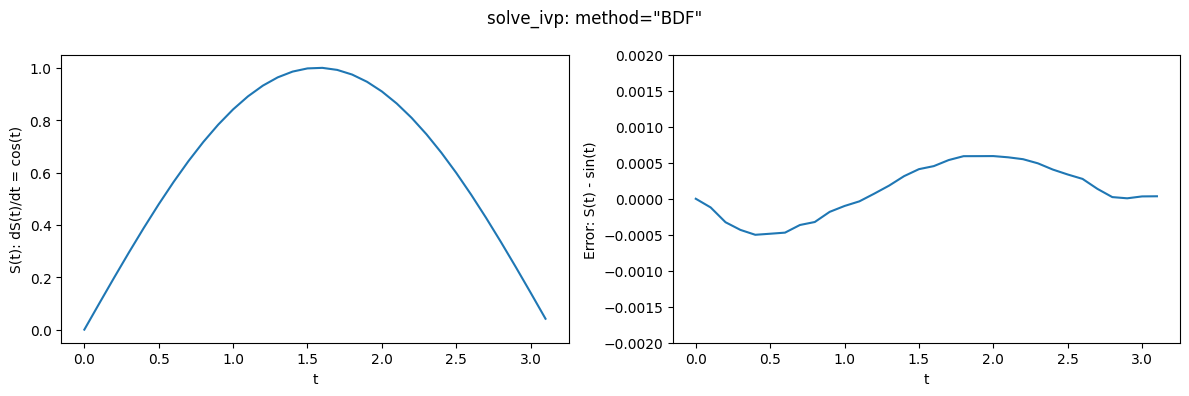

In [79]:
solution_bdf = solve_ivp(cos_func_ivp, [0, np.pi], [0], method='BDF', t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="BDF"')
plt.subplot(121)
plt.plot(solution_bdf.t, solution_bdf.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution_bdf.t, solution_bdf.y[0] - np.sin(solution_bdf.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-0.002, 0.002)
plt.tight_layout()
plt.show()

And, identical (or at least, the same FORTRAN code) to the `odeint` solver, LSODA:

<class 'scipy.integrate._ivp.ivp.OdeResult'>


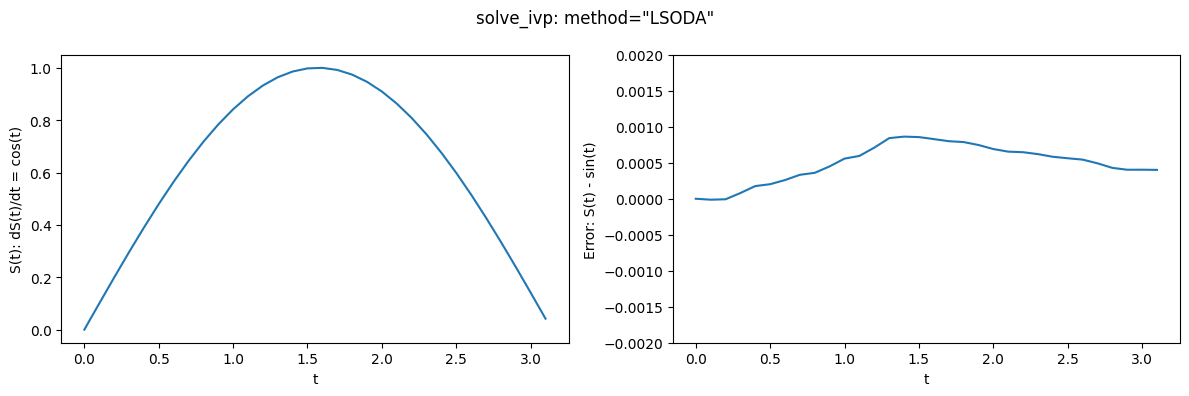

In [80]:
solution_lsoda = solve_ivp(cos_func_ivp, [0, np.pi], [0], method='LSODA', t_eval=t_eval)

print(type(solution_lsoda))

plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="LSODA"')
plt.subplot(121)
plt.plot(solution_lsoda.t, solution_lsoda.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution_lsoda.t, solution_lsoda.y[0] - np.sin(solution_lsoda.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-0.002, 0.002)
plt.tight_layout()
plt.show()

Speaking of `odeint`, we're ready to check it out.

## `odeint`

SciPy does not go on for very long about `odeint` in the documentation, except to say that its purpose is to "Integrate a system of ordinary differential equations" and that you should instead use `solve_ivp` for "new code." It doesn't say why, though!

A very important syntactic difference is that `odeint` expects (by default) a function to be defined and passed in the opposite order that `solve_ide` expects. If we attempted to operate `odeint` with our `cos_func_ivp` it would not work. So, we make a small change to our new function, `cos_func_odeint`.

Also, we must recognize that the odeint function returns a differently shaped datatype for the solution. Note that in the most recent call to `solve_ide` and in this call to `odeint` we are printing the return type.

<class 'numpy.ndarray'>


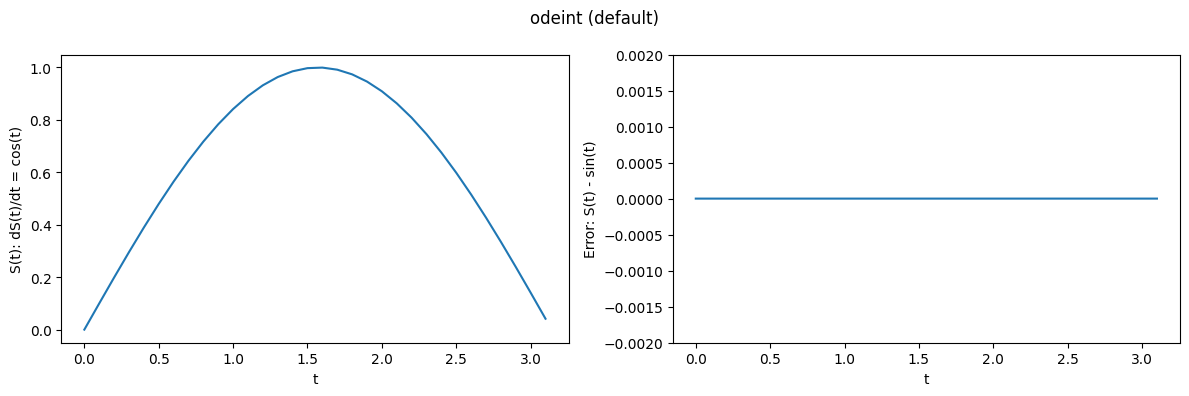

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

def cos_func_odeint(S, t):  # switched order of parameters
    """
    A function for odeint, using a parameter signature as needed.
    """
    # this system is state-independent and S is unused. it is still required for solve_ivp.
    return [np.cos(t)]  # some solvers require a list of functions

t_eval = np.arange(0, np.pi, 0.1)
solution_odeint = odeint(cos_func_odeint, [0], t_eval)

# relevant here, within solution we have:
# array, shape (len(t), len(S0)

print(type(solution_odeint))   

plt.figure(figsize = (12, 4))
plt.suptitle('odeint (default)')
plt.subplot(121)
plt.plot(t_eval, solution_odeint[:,0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(t_eval, solution_odeint[:,0] - np.sin(t_eval))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-0.002, 0.002)
plt.tight_layout()
plt.show()


Wait, is that possible? That can't be possible? Is `odeint` cheating? Does it have a 12th grade trignometry textbook stashed away in FORTRAN? Let's find out.

In [82]:
idx = 25
print(f"t = {t_eval[idx]}")
print(f"odeint: {solution_odeint[idx, 0]}")
print(f"sin(t): {np.sin(t_eval[idx])}")
print(f"diff: {solution_odeint[idx, 0] - np.sin(t_eval[idx])}")

t = 2.5
odeint: 0.5984722164590676
sin(t): 0.5984721441039564
diff: 7.235511112479998e-08


So: not cheating, just really accurate.

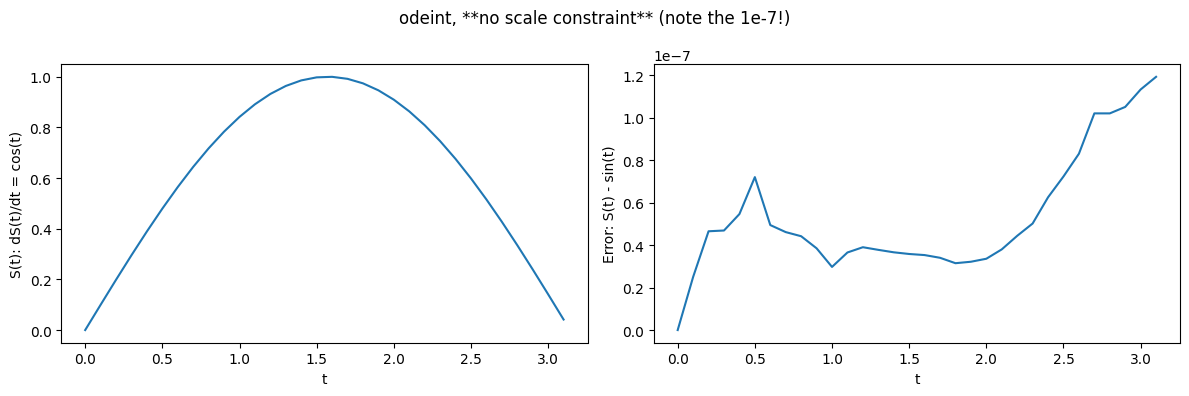

In [83]:
plt.figure(figsize = (12, 4))
plt.suptitle('odeint, **no scale constraint** (note the 1e-7!)')
plt.subplot(121)
plt.plot(t_eval, solution_odeint[:,0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(t_eval, solution_odeint[:,0] - np.sin(t_eval))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.tight_layout()
plt.show()

## Don't dump `solve_ivp`!

However, **don't give up on `solve_ivp` just yet.** We might have a solution in the form of better, more functional control on how the solver behaves. To get this, we can specify error tolerances using two optional function arguments called `rtol` and `atol`. In fact, it is this kind of additional functionality that likely works to make `solve_ivp` more universal... though the additional params are certainly more complicated, and would be very easy to miss to even experienced programmers.

In the comparison below, we'll also roll through a few additional spins of $\pi$.

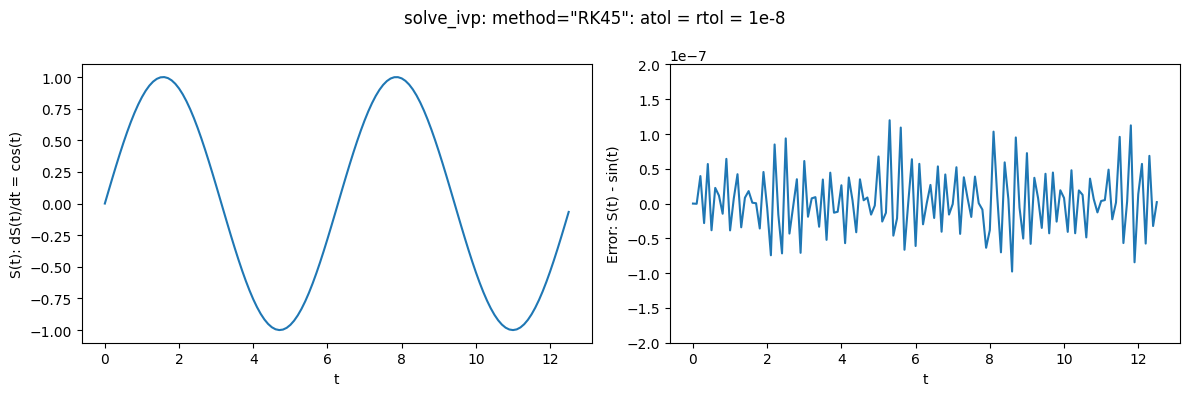

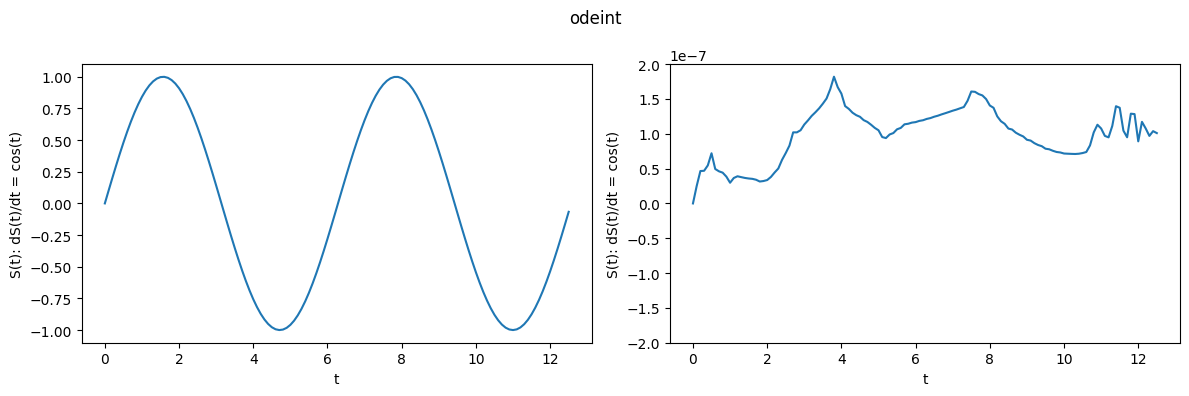

In [84]:
t_eval = np.arange(0, (np.pi * 4), 0.1)

solution_4pi_ivp = solve_ivp(cos_func_ivp, 
                             [0, np.pi * 4], 
                             [0],
                             method = 'RK45',
                             t_eval=t_eval,
                             atol = 1e-8,
                             rtol = 1e-8) # cribbing a scale from the odeint outcome.

solution_4pi_odeint = odeint(cos_func_odeint, [0], t_eval)

plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="RK45": atol = rtol = 1e-8')
plt.subplot(121)
plt.plot(solution_4pi_ivp.t, solution_4pi_ivp.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution_4pi_ivp.t, solution_4pi_ivp.y[0] - np.sin(solution_4pi_ivp.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-1*2*1e-7, 2*1e-7)
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 4))
plt.suptitle('odeint')
plt.subplot(121)
plt.plot(t_eval, solution_4pi_odeint[:,0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(t_eval, solution_4pi_odeint[:,0] - np.sin(t_eval))
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.ylim(-1*2*1e-7, 2*1e-7)
plt.tight_layout()
plt.show()


An interesting and (on behalf of the `odeint` outcome) perhaps surprising result.

These plots are interesting for many reasons, and we could likely go deep into mathematics to explore those reasons. However, from a *programming* perspective, we might be very encouraged to see the additional optionality from `solve_ivp`. Beyond the fact that the erroring of `RK45` looks regular and predictable, it is, in this function, *controllable*. And that sounds like a good deal.

Let's try one more thing before we leave our simple waves behind. Let's take them for a couple more spins, each using the LSODA solver. Just a few spins.

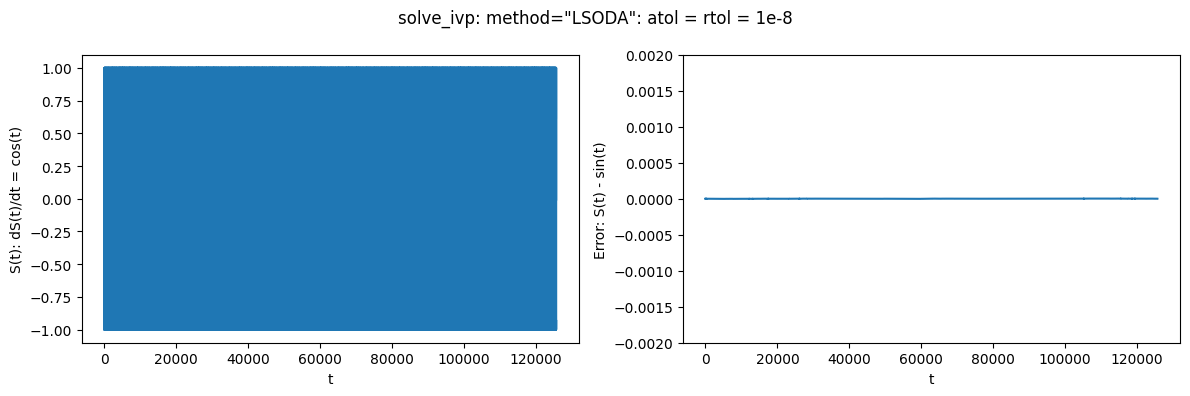

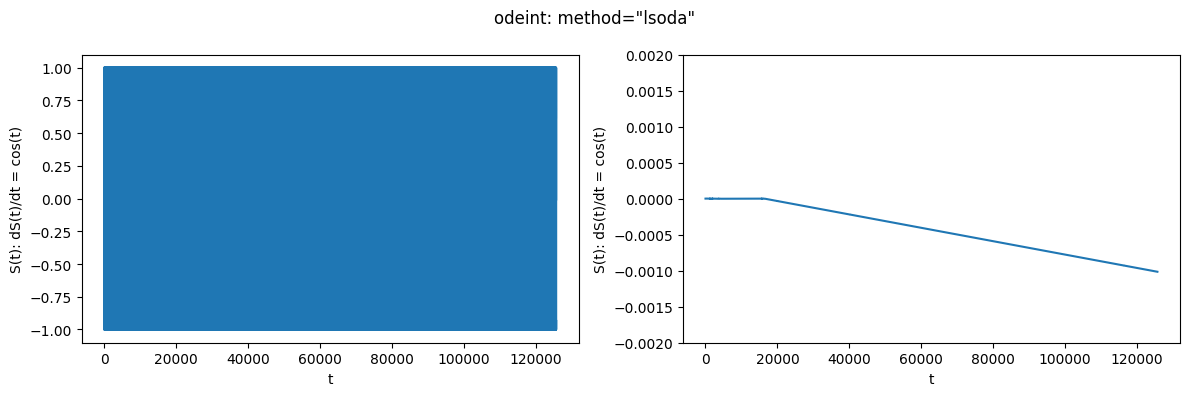

In [85]:
very_much_t_eval = np.arange(0, (np.pi * 40000), 0.1)

solution_4pi_ivp = solve_ivp(cos_func_ivp, 
                             [0, np.pi * 40000], 
                             [0],
                             method = 'LSODA',
                             t_eval=very_much_t_eval,
                             atol = 1e-8,
                             rtol = 1e-8) # cribbing a scale from the odeint outcome.

solution_4pi_odeint = odeint(cos_func_odeint, [0], very_much_t_eval)

plt.figure(figsize = (12, 4))
plt.suptitle('solve_ivp: method="LSODA": atol = rtol = 1e-8')
plt.subplot(121)
plt.plot(solution_4pi_ivp.t, solution_4pi_ivp.y[0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(solution_4pi_ivp.t, solution_4pi_ivp.y[0] - np.sin(solution_4pi_ivp.t))
plt.xlabel('t')
plt.ylabel('Error: S(t) - sin(t)')
plt.ylim(-1*2*1e-3, 2*1e-3)
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 4))
plt.suptitle('odeint: method="lsoda"')
plt.subplot(121)
plt.plot(very_much_t_eval, solution_4pi_odeint[:,0])
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.subplot(122)
plt.plot(very_much_t_eval, solution_4pi_odeint[:,0] - np.sin(very_much_t_eval))
plt.xlabel('t')
plt.ylabel('S(t): dS(t)/dt = cos(t)')
plt.ylim(-1*2*1e-3, 2*1e-3)
plt.tight_layout()
plt.show()

The exploration of these effects is a trip we would need to take in another notebook.

<p align="center">🦋 🦋 🦋</p>

## The Lorenz System

As we move forward, let's recall that the cosine ODE we just explored was *not* state dependent. 

A direct result of that is that errors do not compound over time. But, many ODEs used in IVP solutions are state dependent. Depending on for how "long" the IVP is meant to process, that could be a big difference.

And, as we just saw, not all implementations are alike.

# WIP

Back to the books: This example is adopted from the book chapter's [Problems](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.08-Summary-and-Problems.html#problems) section.

The Lorenz system is a set of three coupled, nonlinear differential equations:

$$\begin{align}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{align}$$

Where:
- $\sigma$ (sigma) is the Prandtl number
- $\rho$ (rho) is the Rayleigh number
- $\beta$ (beta) is related to the physical dimensions of the system

The classic parameter values are $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$, which produce the famous "butterfly" strange attractor.

We will set up our system and conditions below.

In [86]:
sigma = 10
rho = 28
beta = 8/3

## `odeint`

Starting with `odeint`, the older of the two solutions scipy offers, we might point out that the package always operates using the LSODA solver written in FORTRAN at [Lawrence Livermore NL](https://computing.llnl.gov/projects/odepack). The L in LSODA stands for Livermore, in fact, a bit of trivia that can be gleaned from the [excellent README file](https://github.com/scipy/scipy/tree/main/scipy/integrate/odepack) for ODEPACK solvers at the scipy repo.

Let's work with Lorenz in `odeint`.

In [87]:
pass


Todo: processing time.

### Notes


### References

Kong, Q., Siauw, T., & Bayen, A. M. (2021). *Python Programming And Numerical Methods: A Guide For Engineers And Scientists*. Academic Press. Available online at: https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/

Lorenz, E. N. (1963). Deterministic nonperiodic flow. *Journal of the Atmospheric Sciences*, 20(2), 130-141.

SciPy Documentation. (n.d.). Integration and ODEs (`scipy.integrate`). Retrieved from https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html